<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Визначення-Ризику" data-toc-modified-id="Визначення-Ризику-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Визначення Ризику</a></span></li><li><span><a href="#Прибуток" data-toc-modified-id="Прибуток-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Прибуток</a></span></li><li><span><a href="#Управління-ризиками" data-toc-modified-id="Управління-ризиками-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Управління ризиками</a></span></li></ul></div>

## Визначення Ризику

## Прибуток

Стандартне відхилення може бути математично визначено як:

$\sigma = \sqrt{\mathbb{E}(R^2)-[\mathbb{E}(R)]^2}$

де $R$ і $\mathbb{E}$ вказують на річний прибуток і очікування відповідно.

Очікувана прибутковість портфеля є середньозваженим по прибутках від індивідуальних інвестицій
і може бути обчислена як:

$\mathbb{E}(R) = \sum_{i}^n w_i R_i  = w_1 R_1 + w_2 R_2 + \dots + w_n R_n$

Дисперсія портфеля:

$\sigma^2_p = w^2_a\sigma^2_a + w^2_b\sigma^2_b + 2 w_a w_b \text{Cov}(R_a, R_b),$

де $w$ - вага, $\sigma^2$ - дисперсія, $\text{Cov}$ - матриця коваріації:

$\text{Cov}(X, Y) = \mathbb{E}\left[(X - \mathbb{E}(X))*(y - \mathbb{E}(Y)\right]$

Взявши квадратний корінь із дисперсії, отриманої вище, ми отримуємо стандартне відхилення портфеля:

$\sigma_p = \sqrt{\sigma^2_p}$

In [19]:
n_assets = 5

n_simulation = 100

In [20]:
import numpy as np

returns = np.random.randn(n_assets, n_simulation)
returns.shape

(5, 100)

In [21]:
rand = np.random.rand(n_assets)
weights = rand/sum(rand)
weights

array([0.15808328, 0.01023082, 0.02320483, 0.57054192, 0.23793915])

In [30]:
rets = np.mean(returns, axis = 1)
cov = np.cov(rets.T, aweights = weights, ddof = 0)
portfolio_returns = np.dot(weights, rets.T)
portfolio_returns
portfolio_std_dev = np.sqrt(np.dot(weights, np.dot(cov, weights)))
portfolio_returns, portfolio_std_dev

(0.019462168446665498, 0.008589579616951018)

In [32]:
def port_return(returns):
    rets = np.mean(returns, axis = 1)
    cov = np.cov(rets.T, aweights = weights, ddof = 1)
    portfolio_returns = np.dot(weights, rets.T)
    portfolio_std_dev = np.sqrt(np.dot(weights, np.dot(cov, weights)))
    return portfolio_returns, portfolio_std_dev

In [34]:
portfolio = np.array([port_return(np.random.randn(n_assets, n_simulation)) for i in range(100)])
#portfolio

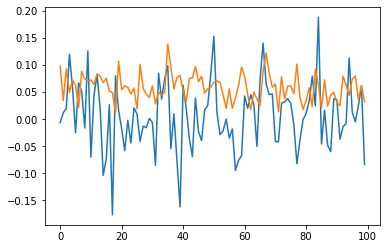

In [35]:
import matplotlib.pyplot as plt
plt.plot(portfolio)

In [39]:
import statsmodels.api as sm
best_fit = sm.OLS(portfolio[:,1], sm.add_constant(portfolio[:,0])).fit().fittedvalues

In [40]:
import plotly.graph_objs as go
fig = go.Figure()
fig.add_trace(go.Scatter(name = 'Risk-Return',
                        x= portfolio[:,0],
                        y = portfolio[:,1],
                        mode = 'markers'))
fig.add_trace(go.Scatter(name = 'Risk-Return',
                        x= portfolio[:,0],
                        y = best_fit,
                        mode = 'lines'))
fig.show()

## Управління ризиками

*Управління фінансовими ризиками* – це процес подолання невизначеності, що виникає на фінансовому ринку. Це передбачає оцінку фінансових ризиків, з якими стикається
організацію та розробку стратегій управління, що відповідають внутрішнім
пріоритетам та політиці компанії.

Можливі стратегій ризику. 

**Ігнорувати**: у цій стратегії компанії приймають усі ризики та їхні наслідки і вважають за краще нічого не робити.

**Передача:** ця стратегія передбачає передачу ризиків третій стороні.

**Пом’якшення:** Компанії розробляють стратегію часткового пом’якшення ризику, тому що
його шкідливий вплив можна вважати надто сильним, порівняно з асоційованою вигодою.

**Прийняти ризик:** якщо компанії приймають стратегію прийняття ризику,
вони належним чином визначають ризики та визнають переваги від них. І способи мінімізувати ризики.